<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [24]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1.1 Conjuntos de datos: Pruebas saber 11 2019-1, 2019-2 y clasificación panteles 2018-1 y 2018-2 

In [156]:
#saber 11 2019-1
saber11_201901 = pd.read_csv('SB11_20191.txt', error_bad_lines=False, sep = "¬", encoding='utf8' )
saber11_201901.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,07/12/2000,20191,SB11201910008548,ESTUDIANTE,COLOMBIA,No,NaN,...,54,39,A1,235,29,58.199483,3.0,3.0,PUBLICAR,NO
1,CC,COLOMBIA,F,23/03/1998,20191,SB11201910004475,ESTUDIANTE,COLOMBIA,No,NaN,...,35,10,A-,217,21,51.018527,2.0,3.0,PUBLICAR,NO
2,TI,COLOMBIA,M,22/03/2001,20191,SB11201910011427,ESTUDIANTE,COLOMBIA,No,NaN,...,49,32,A1,246,34,50.855657,2.0,3.0,PUBLICAR,NO
3,CC,COLOMBIA,M,16/06/1994,20191,SB11201910041975,ESTUDIANTE,COLOMBIA,No,NaN,...,64,55,A2,255,38,52.688203,3.0,3.0,PUBLICAR,NO
4,CC,COLOMBIA,F,21/09/2000,20191,SB11201910014490,ESTUDIANTE,COLOMBIA,No,NaN,...,71,64,B1,280,48,73.930829,4.0,4.0,PUBLICAR,NO


In [361]:
#dimensiones 
print("Filas y columnas pruebas saber 11 2019-1", saber11_201901.shape)

Filas y columnas pruebas saber 11 2019-1 (21083, 82)


In [186]:
#Tipos de datos saber 11 2019-1
print(saber11_201901.dtypes)

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
ESTU_INSE_INDIVIDUAL        float64
ESTU_NSE_INDIVIDUAL         float64
ESTU_NSE_ESTABLECIMIENTO    float64
ESTU_ESTADOINVESTIGACION     object
ESTU_GENERACION-E            object
Length: 82, dtype: object


In [187]:
#saber 11 2019-2
saber11_201902 = pd.read_csv('SB11_20192.txt', error_bad_lines=False, sep = "¬", encoding='utf8' )
saber11_201902.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,18/02/2002,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,NaN,...,54.0,67,A1,208,25.0,50.942156,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,F,24/01/2003,20194,SB11201940469859,ESTUDIANTE,No,COLOMBIA,NaN,...,64.0,89,A2,280,74.0,61.920976,3.0,3.0,PUBLICAR,NO
2,TI,COLOMBIA,M,28/06/2003,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,NaN,...,63.0,88,A2,299,83.0,59.767864,3.0,4.0,PUBLICAR,NO
3,TI,COLOMBIA,M,02/06/2001,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,NaN,...,64.0,89,A2,299,84.0,50.764238,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,26/04/2002,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88.0,45.779135,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD


In [362]:
#Dimesiones 
print("Filas y columnas pruebas saber 11 2019-2",saber11_201902.shape)

Filas y columnas pruebas saber 11 2019-2 (546212, 82)


In [189]:
#tipos de datos saber 11 2019-2
print(saber11_201902.dtypes)

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
ESTU_INSE_INDIVIDUAL        float64
ESTU_NSE_INDIVIDUAL         float64
ESTU_NSE_ESTABLECIMIENTO    float64
ESTU_ESTADOINVESTIGACION     object
ESTU_GENERACION-E            object
Length: 82, dtype: object


In [153]:
#Clasificacion planteles 2018-1
for i in clasif_planteles_20181:
    if i[:3] == 'Unn':
        clasif_planteles_20181.drop(i, axis=1, inplace= True)
clasif_planteles_20181.head()

,PERIODO,COLE_COD_DANE,COLE_INST_NOMBRE,COLE_CODMPIO_COLEGIO,COLE_MPIO_MUNICIPIO,COLE_COD_DEPTO,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_GRADO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
0,20181,308001074789,AMERICAN SCHOOL,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,77,76,0.8184,0.8297,0.8215,0.8145,0.9203,0.8287,A+
1,20181,308573000450,INSTITUCION EDUCATIVA ASPAEN GIMNASIO ALTAMAR ...,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,M,34,34,0.8173,0.8321,0.8212,0.8125,0.9068,0.8274,A+
2,20181,308001073952,COLEGIO ALTAMIRA,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,127,120,0.8870,0.8848,0.8731,0.8633,0.9562,0.8832,A+
3,20181,308001101153,COLEGIO BRITANICO INTERNACIONAL,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,164,159,0.8626,0.8581,0.8374,0.8402,0.9496,0.8573,A+
4,20181,308573074909,COLEGIO SAN JOSÉ,8573,PUERTO COLOMBIA,8,ATLANTICO,NO OFICIAL,11,B,MI,248,238,0.8541,0.8493,0.8423,0.8378,0.9217,0.8517,A+


In [364]:
#Dimesiones clasificación planteles 2018-1
print("Filas y clasificación planteles 2018-1",clasif_planteles_20181.shape)

Filas y clasificación planteles 2018-1 (281, 20)


In [191]:
#tipos de datos clasificación planteles 2018-1
print(clasif_planteles_20181.dtypes)

PERIODO                         int64
COLE_COD_DANE                   int64
COLE_INST_NOMBRE               object
COLE_CODMPIO_COLEGIO            int64
COLE_MPIO_MUNICIPIO            object
COLE_COD_DEPTO                  int64
COLE_DEPTO_COLEGIO             object
COLE_NATURALEZA                object
COLE_GRADO                      int64
COLE_CALENDARIO_COLEGIO        object
COLE_GENEROPOBLACION           object
MATRICULADOS_ULTIMOS_3          int64
EVALUADOS_ULTIMOS_3             int64
INDICE_MATEMATICAS            float64
INDICE_C_NATURALES            float64
INDICE_SOCIALES_CIUDADANAS    float64
INDICE_LECTURA_CRITICA        float64
INDICE_INGLES                 float64
INDICE_TOTAL                  float64
COLE_CATEGORIA                 object
dtype: object


In [192]:
#Clasificacion planteles 2018-2
clasif_planteles_20182 = pd.read_csv('SB11-CLASIFI-PLANTELES-20182.txt', sep = "¬", encoding = "utf8")
clasif_planteles_20182.head()

,PERIODO,COLE_COD_DANE,COLE_INST_NOMBRE,COLE_CODMPIO_COLEGIO,COLE_MPIO_MUNICIPIO,COLE_COD_DEPTO,COLE_DEPTO_COLEGIO,COLE_NATURALEZA,COLE_GRADO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,MATRICULADOS_ULTIMOS_3,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
0,20182,205790000235,I. E. LA INMACULADA,5790,TARAZÁ,5,ANTIOQUIA,OFICIAL,11,A,MI,72,61,"0,54","0,5809","0,5543","0,615","0,5495","0,5708",D
1,20182,154128000019,INST EDUCATIVA COL NUESTRA SEÑORA DEL ROSARIO,54128,CÁCHIRA,54,NORTE SANTANDER,OFICIAL,11,A,MI,85,85,"0,7415","0,7333","0,6653","0,7254","0,6765","0,7133",B
2,20182,108433000051,INSTITUCION EDUCATIVA SIMON BOLIVAR,8433,MALAMBO,8,ATLANTICO,OFICIAL,11,A,MI,198,194,"0,6055","0,6358","0,609","0,666","0,6434","0,6302",C
3,20182,105147000568,I. E. JOSE MARIA MUÑOZ FLOREZ,5147,CAREPA,5,ANTIOQUIA,OFICIAL,11,A,MI,266,262,"0,6977","0,665","0,6726","0,7084","0,6564","0,6836",B
4,20182,105147000401,I. E. COLOMBIA,5147,CAREPA,5,ANTIOQUIA,OFICIAL,11,A,MI,276,238,"0,6607","0,6462","0,6305","0,6924","0,6099","0,6538",C


In [366]:
#dimensiones 
print("Filas y clasificación planteles 2018-2",clasif_planteles_20182.shape)

Filas y clasificación planteles 2018-2 (9150, 20)


In [367]:
#tipo de datos Filas y clasificación planteles 2018-12
print(clasif_planteles_20182.dtypes)

PERIODO                        int64
COLE_COD_DANE                  int64
COLE_INST_NOMBRE              object
COLE_CODMPIO_COLEGIO           int64
COLE_MPIO_MUNICIPIO           object
COLE_COD_DEPTO                 int64
COLE_DEPTO_COLEGIO            object
COLE_NATURALEZA               object
COLE_GRADO                     int64
COLE_CALENDARIO_COLEGIO       object
COLE_GENEROPOBLACION          object
MATRICULADOS_ULTIMOS_3         int64
EVALUADOS_ULTIMOS_3            int64
INDICE_MATEMATICAS            object
INDICE_C_NATURALES            object
INDICE_SOCIALES_CIUDADANAS    object
INDICE_LECTURA_CRITICA        object
INDICE_INGLES                 object
INDICE_TOTAL                  object
COLE_CATEGORIA                object
dtype: object


In [749]:
#selección de variables de os conjunto de datos que se presume que pueden explicar los resultados de las pruebas
df_201901=saber11_201901[[ "ESTU_GENERO", "ESTU_CONSECUTIVO",  "ESTU_TIENEETNIA", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", 
"ESTU_MCPIO_RESIDE", "FAMI_ESTRATOVIVIENDA",  "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE" ,
"FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET",  
"FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO" ,
"FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET" , "COLE_NATURALEZA",
"COLE_BILINGUE", "COLE_CARACTER","COLE_COD_DANE_ESTABLECIMIENTO", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_JORNADA",
"PUNT_GLOBAL","PERCENTIL_GLOBAL", "ESTU_INSE_INDIVIDUAL"]]

df_201902=saber11_201902[[ "ESTU_GENERO", "ESTU_CONSECUTIVO",  "ESTU_TIENEETNIA", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", 
"ESTU_MCPIO_RESIDE", "FAMI_ESTRATOVIVIENDA",  "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE" ,
"FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET", 
 "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO",
"FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET" , "COLE_NATURALEZA",
"COLE_BILINGUE", "COLE_CARACTER","COLE_COD_DANE_ESTABLECIMIENTO", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_JORNADA", 
"PUNT_GLOBAL","PERCENTIL_GLOBAL", "ESTU_INSE_INDIVIDUAL"]]

#seleccion de variables de la clasificación de los palentes 
panteles_20181 = clasif_planteles_20181[["INDICE_TOTAL", "COLE_COD_DANE", "COLE_CATEGORIA"]]
panteles_20182 = clasif_planteles_20182[["INDICE_TOTAL", "COLE_COD_DANE", "COLE_CATEGORIA"]]



In [750]:
#union de los conjuntos de datos 
df_resultados_2019 = df_201901.append(df_201902)
df_colegios_2018 = panteles_20181.append(panteles_20182)
df_resultados_2019["COLE_COD_DANE"] = df_resultados_2019["COLE_COD_DANE_ESTABLECIMIENTO"] 


In [751]:
#dimenciones union pruebas saber 2019 
print("filas y columnas Prubas saber 11 2019-1 y 2019-2",  df_resultados_2019.shape)

filas y columnas Prubas saber 11 2019-1 y 2019-2 (567295, 28)


In [752]:
#dimensiones colegios 
print("filas y columnas colegios 2018", df_colegios_2018.shape)

filas y columnas colegios 2018 (9431, 3)


In [753]:
#verificar dupicados en los colegios
len(df_colegios_2018["COLE_COD_DANE"].unique()) 
df_colegios_2018[df_colegios_2018.COLE_COD_DANE.duplicated()].COLE_COD_DANE.iloc[:]

9       205138000142
14      205858000093
30      105467000019
33      117050000316
45      125873000209
            ...     
8870    241791000332
8879    144430000031
8936    247288001168
9035    311001800081
9122    217001001557
Name: COLE_COD_DANE, Length: 450, dtype: int64

In [780]:
#transfomar tipo de datos y agrupar para eliminar datos duplicados 
def cambiar_comas (x, var1):
    if type(x[var1]) == str:
        x[var1]=x[var1].replace(",", ".")
    return x
df_colegios_2018 = df_colegios_2018.apply(lambda x: cambiar_comas(x, 'INDICE_TOTAL'), axis = 1)
df_colegios_2018["INDICE_TOTAL"] = pd.to_numeric(df_colegios_2018["INDICE_TOTAL"])

df_avg=df_colegios_2018[["COLE_COD_DANE", "INDICE_TOTAL"]].groupby(["COLE_COD_DANE"]).aggregate(["mean"])
dg_max=df_colegios_2018[["COLE_COD_DANE", "COLE_CATEGORIA"]].groupby(["COLE_COD_DANE"]).aggregate(["max"])

df_agg_colegios = pd.merge(df_avg,dg_max, left_index=True,right_index=True, how='inner')
df_agg_colegios.shape

(8981, 2)

In [786]:
#tabla final de los resultados 
resultatos_saber11_2019 = pd.merge(df_resultados_2019, df_agg_colegios,  on = "COLE_COD_DANE", how='left')
resultatos_saber11_2019["colegio_categoria"] =resultatos_saber11_2019.iloc[:,[-1]]
resultatos_saber11_2019["indice_total_colegio"] =resultatos_saber11_2019.iloc[:,[-3]]
resultatos_saber11_2019.drop(resultatos_saber11_2019.iloc[:,[-3]], axis=1, inplace= True)
resultatos_saber11_2019.drop(resultatos_saber11_2019.iloc[:,[-3]], axis=1, inplace= True)
resultatos_saber11_2019.head()

C:\Users\capenara\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,ESTU_GENERO,ESTU_CONSECUTIVO,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,...,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_JORNADA,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,COLE_COD_DANE,colegio_categoria,indice_total_colegio
0,F,SB11201910008548,No,NaN,VALLE,CALI,Estrato 4,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...",...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,235,29.0,58.199483,176001002555,D,0.61015
1,F,SB11201910004475,No,NaN,VALLE,CALI,Estrato 3,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,217,21.0,51.018527,176001002555,D,0.61015
2,M,SB11201910011427,No,NaN,VALLE,CALI,Estrato 2,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,246,34.0,50.855657,176001002555,D,0.61015
3,M,SB11201910041975,No,NaN,VALLE,CALI,Estrato 2,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...",...,TÉCNICO/ACADÉMICO,176001002555,INSTITUCIÓN EDUCATIVA TÉCNICA COMERCIAL HERNAN...,NOCHE,255,38.0,52.688203,176001002555,D,0.61015
4,F,SB11201910014490,No,NaN,BOGOTA,BOGOTÁ D.C.,Estrato 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...",...,ACADÉMICO,311848001011,COL ANGLO COLOMBIANO ...,COMPLETA,280,48.0,73.930829,311848001011,A+,0.86790


In [787]:
#dimensiones
print("filas y columnas resultados 2019", resultatos_saber11_2019.shape)

filas y columnas resultados 2019 (567295, 30)


In [788]:
#validación de datos unicos
len(resultatos_saber11_2019["ESTU_CONSECUTIVO"].unique()) 

567295

In [789]:
#nulls
resultatos_saber11_2019.isnull().sum()

ESTU_GENERO                         106
ESTU_CONSECUTIVO                      0
ESTU_TIENEETNIA                     394
ESTU_ETNIA                       527063
ESTU_DEPTO_RESIDE                   394
ESTU_MCPIO_RESIDE                   394
FAMI_ESTRATOVIVIENDA              35928
FAMI_EDUCACIONPADRE               31872
FAMI_EDUCACIONMADRE               31694
FAMI_TRABAJOLABORPADRE            19192
FAMI_TRABAJOLABORMADRE            18354
FAMI_TIENEINTERNET                32346
FAMI_NUMLIBROS                    46414
FAMI_COMELECHEDERIVADOS           38231
FAMI_COMECARNEPESCADOHUEVO        33943
FAMI_SITUACIONECONOMICA           18758
ESTU_DEDICACIONLECTURADIARIA      33123
ESTU_DEDICACIONINTERNET           34330
COLE_NATURALEZA                       0
COLE_BILINGUE                     91546
COLE_CARACTER                     16399
COLE_COD_DANE_ESTABLECIMIENTO         0
COLE_NOMBRE_ESTABLECIMIENTO           0
COLE_JORNADA                          0
PUNT_GLOBAL                           0


In [790]:
#eliminar variables con un gran volumen de valores null y no se usaran en el analisis, 
#como el id del estudiante o el id del colegio 
resultatos_saber11_2019_final = resultatos_saber11_2019.drop(['COLE_NOMBRE_ESTABLECIMIENTO','ESTU_CONSECUTIVO', 'ESTU_ETNIA', 'COLE_COD_DANE', 'COLE_COD_DANE_ESTABLECIMIENTO'], axis=1)
resultatos_saber11_2019_final.head()

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,...,ESTU_DEDICACIONINTERNET,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_JORNADA,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,colegio_categoria,indice_total_colegio
0,F,No,VALLE,CALI,Estrato 4,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,235,29.0,58.199483,D,0.61015
1,F,No,VALLE,CALI,Estrato 3,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,217,21.0,51.018527,D,0.61015
2,M,No,VALLE,CALI,Estrato 2,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Tiene un trabajo de tipo auxiliar administrati...,Si,...,30 minutos o menos,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,246,34.0,50.855657,D,0.61015
3,M,No,VALLE,CALI,Estrato 2,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Más de 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,255,38.0,52.688203,D,0.61015
4,F,No,BOGOTA,BOGOTÁ D.C.,Estrato 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,NO OFICIAL,S,ACADÉMICO,COMPLETA,280,48.0,73.930829,A+,0.86790


In [791]:
#tipo de variables de las variables seleccionadas 
print(resultatos_saber11_2019_final.dtypes, resultatos_saber11_2019_final.shape)

ESTU_GENERO                      object
ESTU_TIENEETNIA                  object
ESTU_DEPTO_RESIDE                object
ESTU_MCPIO_RESIDE                object
FAMI_ESTRATOVIVIENDA             object
FAMI_EDUCACIONPADRE              object
FAMI_EDUCACIONMADRE              object
FAMI_TRABAJOLABORPADRE           object
FAMI_TRABAJOLABORMADRE           object
FAMI_TIENEINTERNET               object
FAMI_NUMLIBROS                   object
FAMI_COMELECHEDERIVADOS          object
FAMI_COMECARNEPESCADOHUEVO       object
FAMI_SITUACIONECONOMICA          object
ESTU_DEDICACIONLECTURADIARIA     object
ESTU_DEDICACIONINTERNET          object
COLE_NATURALEZA                  object
COLE_BILINGUE                    object
COLE_CARACTER                    object
COLE_JORNADA                     object
PUNT_GLOBAL                       int64
PERCENTIL_GLOBAL                float64
ESTU_INSE_INDIVIDUAL            float64
colegio_categoria                object
indice_total_colegio            float64


In [792]:
#Vista general del conjunto de datos
resultatos_saber11_2019_final.sample(5).T

,333042,81695,452314,126594,563901
ESTU_GENERO,F,M,F,F,F
ESTU_TIENEETNIA,No,No,No,No,Si
ESTU_DEPTO_RESIDE,VALLE,QUINDIO,SANTANDER,HUILA,CESAR
ESTU_MCPIO_RESIDE,CALI,CALARCÁ,BUCARAMANGA,PALERMO,EL COPEY
FAMI_ESTRATOVIVIENDA,NaN,Estrato 2,Estrato 3,Estrato 2,Estrato 2
FAMI_EDUCACIONPADRE,NaN,No Aplica,Secundaria (Bachillerato) incompleta,Primaria incompleta,Secundaria (Bachillerato) completa
FAMI_EDUCACIONMADRE,NaN,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Primaria incompleta,Secundaria (Bachillerato) completa
FAMI_TRABAJOLABORPADRE,No aplica,No aplica,Trabaja por cuenta propia (por ejemplo plomero...,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero"
FAMI_TRABAJOLABORMADRE,Es vendedor o trabaja en atención al público,No aplica,"Trabaja en el hogar, no trabaja o estudia",Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público
FAMI_TIENEINTERNET,NaN,Si,Si,Si,No


In [795]:
#porcentaje de valores perdidos respecto al total de todos los datos 
null_v=resultatos_saber11_2019_final.isnull().sum()
total_celdas = np.product(resultatos_saber11_2019_final.shape)
print((null_v/total_celdas)*100, total_celdas)

ESTU_GENERO                     0.000747
ESTU_TIENEETNIA                 0.002778
ESTU_DEPTO_RESIDE               0.002778
ESTU_MCPIO_RESIDE               0.002778
FAMI_ESTRATOVIVIENDA            0.253329
FAMI_EDUCACIONPADRE             0.224730
FAMI_EDUCACIONMADRE             0.223475
FAMI_TRABAJOLABORPADRE          0.135323
FAMI_TRABAJOLABORMADRE          0.129414
FAMI_TIENEINTERNET              0.228072
FAMI_NUMLIBROS                  0.327265
FAMI_COMELECHEDERIVADOS         0.269567
FAMI_COMECARNEPESCADOHUEVO      0.239332
FAMI_SITUACIONECONOMICA         0.132263
ESTU_DEDICACIONLECTURADIARIA    0.233550
ESTU_DEDICACIONINTERNET         0.242061
COLE_NATURALEZA                 0.000000
COLE_BILINGUE                   0.645491
COLE_CARACTER                   0.115629
COLE_JORNADA                    0.000000
PUNT_GLOBAL                     0.000000
PERCENTIL_GLOBAL                0.000134
ESTU_INSE_INDIVIDUAL            0.126150
colegio_categoria               0.513024
indice_total_col

La base final tiene como resultados un tamaño de 567295 filas y 25 columnas. Esta base final comprende los periodos 1 y 2 del año 2019 (Año que se presume como normal) y los resultados de clasificación de los colegios de los periodos 1 y 2 del año 2018. 
Las variables que se tomaron a consideración que pueden explicar los resultados de los participantes de la prueba son:

- ESTU_GENERO: Genero 
- ESTU_TIENEETNIA: Etnia a la que pertenece 
- ESTU_DEPTO_RESIDE: departamento donde reside 
- ESTU_MCPIO_RESIDE: municipio donde reside
- FAMI_ESTRATOVIVIENDA: estrato vivienda
- FAMI_EDUCACIONPADRE: nivel máximo de educación padre
- FAMI_EDUCACIONMADRE: nivel máximo de educación madre
- FAMI_TRABAJOLABORPADRE: Trabajo del padre 
- FAMI_TRABAJOLABORMADRE: Trabajo de la madre
- FAMI_TIENEINTERNET: Tiene internet 
- FAMI_NUMLIBROS: número de libros en el hogar 
- FAMI_COMELECHEDERIVADOS: ¿Cuántas veces por semana se comen los siguientes alimentos en su hogar? Leche o derivados (queso, yogurt, etc.)
- FAMI_COMECARNEPESCADOHUEVO: ¿Cuántas veces por semana se comen los siguientes alimentos en su hogar? Carne (pollo, pavo, res, cordero, cerdo, conejo, etc.), pescados o huevos
- FAMI_SITUACIONECONOMICA: Con respecto al año inmediatamente anterior, la situación económica de su hogar es:
- ESTU_DEDICACIONLECTURADIARIA: Usualmente, ¿cuánto tiempo al día dedica a leer por entretenimiento?
- ESTU_DEDICACIONINTERNET: Usualmente, ¿cuánto tiempo al día dedica a navegar en internet? Excluya actividades académicas
- COLE_NATURALEZA: Indica la naturaleza del Establecimiento
- COLE_BILINGUE: Indica si el Establecimiento es bilingüe o no
- COLE_CARACTER: Indica el carácter del Establecimiento
- COLE_JORNADA: Jornada de la Sede
- PUNT_GLOBAL: Puntaje total obtenido
- PERCENTIL_GLOBAL: Percentil global en que se encuentra el evaluado
- ESTU_INSE_INDIVIDUAL: Nivel Socioeconómico del evaluado
- ('INDICE_TOTAL', 'mean'): Índice promedio del colegio del evaluado 
- ('COLE_CATEGORIA', 'max'): categoría del colegio del evaluado 

La relación de los datos faltantes frente al conteo total de registros de la base da como resultado valores no significativos, por lo cual se puede imputar los datos faltantes teniendo en cuenta las características propias de la variable. Sin embargo, para se tendrán en cuenta dos conjuntos de datos: uno con imputaciones de los datos faltantes y uno con los datos faltantes.
Los porcentajes de datos faltantes frente al total de registros del conjunto de datos se encuentra en la tabla previa. 


In [796]:
#imputar datos numericos y categoricos y crer base copia con los datos imputados: Se imputa con moda y promedio 
def imput_faltantes (df):
    df_copy = df.copy() 
    for i in df:
        if df_copy[i].dtypes == object:
            df_copy[i].fillna(df_copy[i].mode()[0] , inplace = True)
        else:
            df_copy[i].fillna(df_copy[i].mean() , inplace = True)
    return df_copy 

df_imput = imput_faltantes(resultatos_saber11_2019_final)
df_imput.head()

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,...,ESTU_DEDICACIONINTERNET,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,COLE_JORNADA,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,colegio_categoria,indice_total_colegio
0,F,No,VALLE,CALI,Estrato 4,Técnica o tecnológica incompleta,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,235,29.0,58.199483,D,0.61015
1,F,No,VALLE,CALI,Estrato 3,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,217,21.0,51.018527,D,0.61015
2,M,No,VALLE,CALI,Estrato 2,Primaria incompleta,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Tiene un trabajo de tipo auxiliar administrati...,Si,...,30 minutos o menos,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,246,34.0,50.855657,D,0.61015
3,M,No,VALLE,CALI,Estrato 2,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Más de 3 horas,OFICIAL,N,TÉCNICO/ACADÉMICO,NOCHE,255,38.0,52.688203,D,0.61015
4,F,No,BOGOTA,BOGOTÁ D.C.,Estrato 6,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,...,Entre 1 y 3 horas,NO OFICIAL,S,ACADÉMICO,COMPLETA,280,48.0,73.930829,A+,0.86790


In [797]:
#validacion datos imputados
null_v=df_imput.isnull().sum()
total_celdas = np.product(df_imput.shape)
print((null_v/total_celdas)*100, total_celdas, df_imput.dtypes)

ESTU_GENERO                     0.0
ESTU_TIENEETNIA                 0.0
ESTU_DEPTO_RESIDE               0.0
ESTU_MCPIO_RESIDE               0.0
FAMI_ESTRATOVIVIENDA            0.0
FAMI_EDUCACIONPADRE             0.0
FAMI_EDUCACIONMADRE             0.0
FAMI_TRABAJOLABORPADRE          0.0
FAMI_TRABAJOLABORMADRE          0.0
FAMI_TIENEINTERNET              0.0
FAMI_NUMLIBROS                  0.0
FAMI_COMELECHEDERIVADOS         0.0
FAMI_COMECARNEPESCADOHUEVO      0.0
FAMI_SITUACIONECONOMICA         0.0
ESTU_DEDICACIONLECTURADIARIA    0.0
ESTU_DEDICACIONINTERNET         0.0
COLE_NATURALEZA                 0.0
COLE_BILINGUE                   0.0
COLE_CARACTER                   0.0
COLE_JORNADA                    0.0
PUNT_GLOBAL                     0.0
PERCENTIL_GLOBAL                0.0
ESTU_INSE_INDIVIDUAL            0.0
colegio_categoria               0.0
indice_total_colegio            0.0
dtype: float64 14182375 ESTU_GENERO                      object
ESTU_TIENEETNIA                  obj

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

## Demográficas 

### Genero de los participantes 

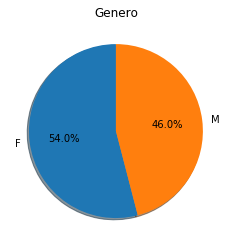

In [443]:
data = df_imput['ESTU_GENERO'].value_counts()/df_imput['ESTU_GENERO'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Genero');

### Puntaje global 

C:\Users\capenara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


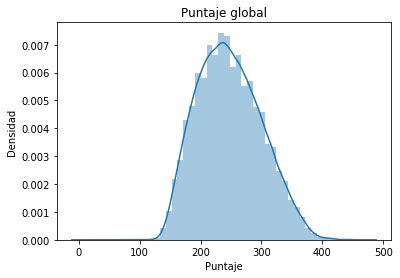

In [452]:
#Distribucion del puntaje global 
data = df_imput['PUNT_GLOBAL']
sns.distplot(data)
plt.title('Puntaje global')
plt.xlabel('Puntaje')
plt.ylabel('Densidad');

### Puntaje global - Genero 

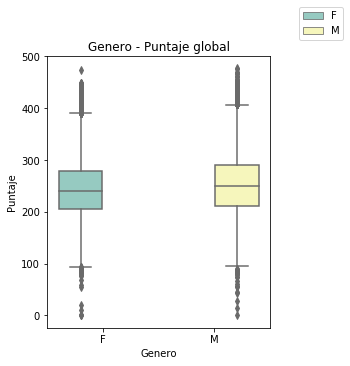

In [456]:
x = 4
y = 5
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_GENERO", y= "PUNT_GLOBAL", hue="ESTU_GENERO",
                 data=df_imput, linewidth=1.5, palette="Set3")
plt.title("Genero - Puntaje global")
plt.xlabel("Genero")
plt.ylabel("Puntaje")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper right')
plt.show()

### Etnia

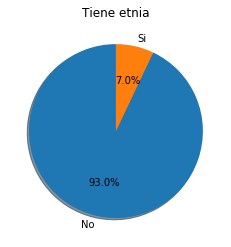

In [704]:
data = df_imput['ESTU_TIENEETNIA'].value_counts()/df_imput['ESTU_TIENEETNIA'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Tiene etnia');

### Tiene etnia - Puntaje global

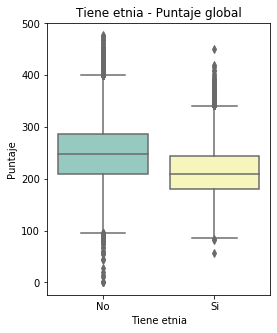

In [706]:
x = 4
y = 5
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_TIENEETNIA", y= "PUNT_GLOBAL", 
                 data=df_imput, linewidth=1.5, palette="Set3")
plt.title("Tiene etnia - Puntaje global")
plt.xlabel("Tiene etnia")
plt.ylabel("Puntaje")
plt.show()

### Caracteristicas por departamento y municipio


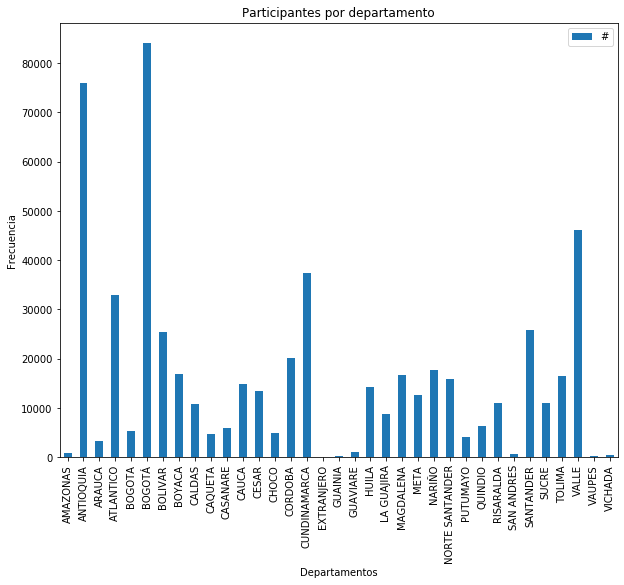

In [482]:
x = 10
y = 8
df_imput[["ESTU_DEPTO_RESIDE", "ESTU_INSE_INDIVIDUAL"]].groupby(["ESTU_DEPTO_RESIDE"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Departamentos") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Participantes por departamento")
plt.show();

#### Top 10 (Cantidad de participantes) Departamento  - Puntaje global

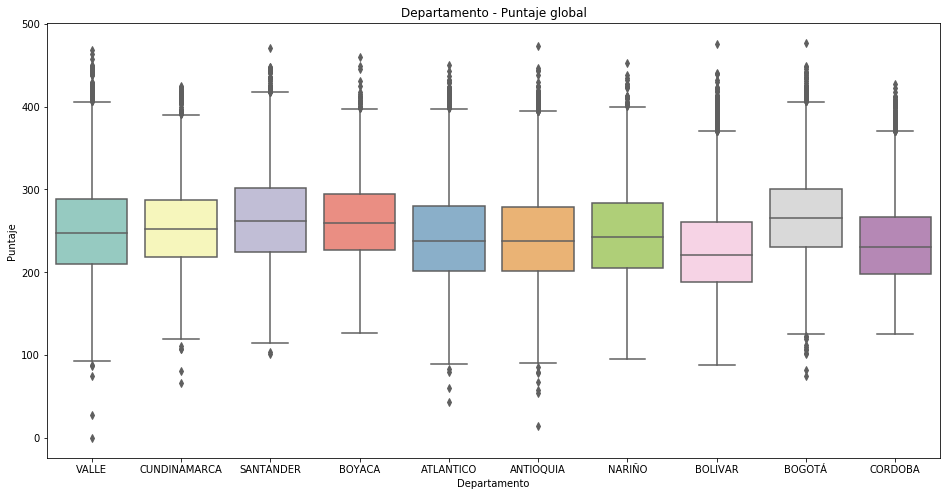

In [574]:
top_10_departamentos = df_imput[["ESTU_DEPTO_RESIDE", "ESTU_INSE_INDIVIDUAL"]].groupby(["ESTU_DEPTO_RESIDE"]).count().sort_values("ESTU_INSE_INDIVIDUAL", ascending=False)[:10]
top = [i for i in top_10_departamentos.index]

data=df_imput[df_imput.ESTU_DEPTO_RESIDE.isin(top)]

x = 16
y = 8
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_DEPTO_RESIDE", y= "PUNT_GLOBAL",
                 data=data, linewidth=1.5, palette="Set3")
plt.title("Departamento - Puntaje global")
plt.xlabel("Departamento")
plt.ylabel("Puntaje")
plt.show()

#### top 10 (Cantidad de participantes) Municipios - Puntaje global

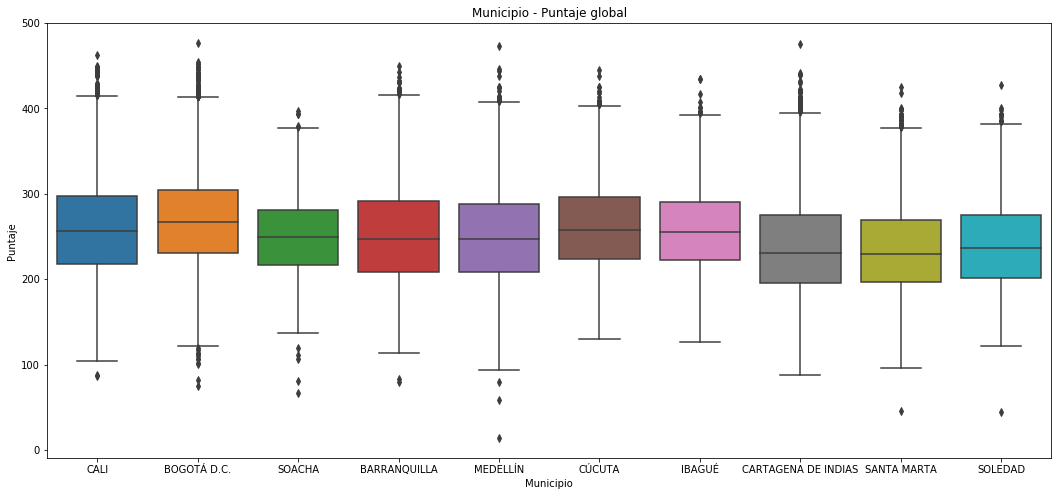

In [573]:
top_10_municipios = df_imput[["ESTU_MCPIO_RESIDE", "ESTU_INSE_INDIVIDUAL"]].groupby(["ESTU_MCPIO_RESIDE"]).count().sort_values("ESTU_INSE_INDIVIDUAL", ascending=False)[:10]
top = [i for i in top_10_municipios.index]

data=df_imput[df_imput.ESTU_MCPIO_RESIDE.isin(top)]

x = 18
y = 8
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="ESTU_MCPIO_RESIDE", y= "PUNT_GLOBAL",
                 data=data, linewidth=1.5)
plt.title("Municipio - Puntaje global")
plt.xlabel("Municipio")
plt.ylabel("Puntaje")
plt.show()

### Características por Estrato

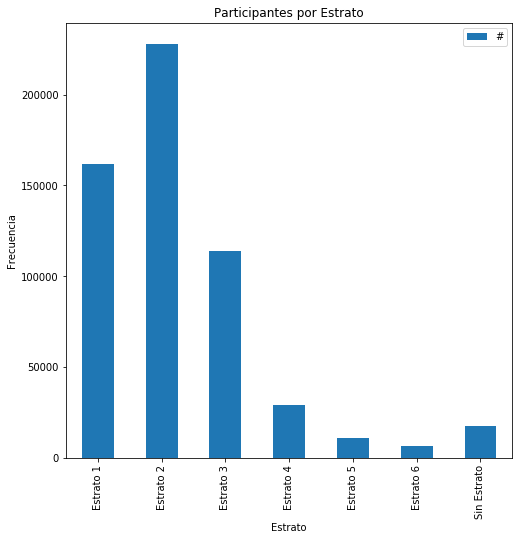

In [548]:
x = 8
y = 8
df_imput[["FAMI_ESTRATOVIVIENDA", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_ESTRATOVIVIENDA"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Estrato") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Participantes por Estrato")
plt.show();

#### Estrato - Puntaje global

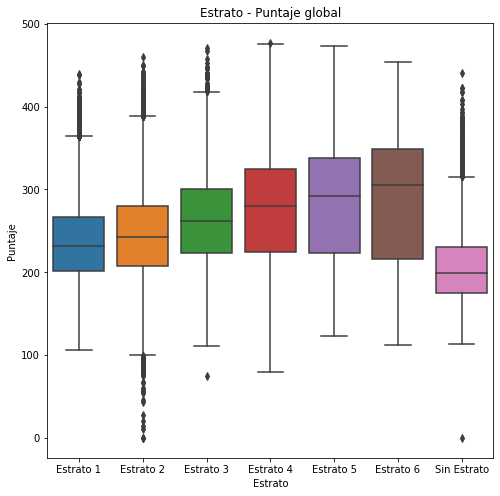

In [572]:
x = 8
y = 8

estratos=[i for i in df_imput["FAMI_ESTRATOVIVIENDA"].unique()]
estratos.sort()

plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = estratos )
plt.title("Estrato - Puntaje global")
plt.xlabel("Estrato")
plt.ylabel("Puntaje")
plt.show()

### Educación  padres

#### Padre y madre

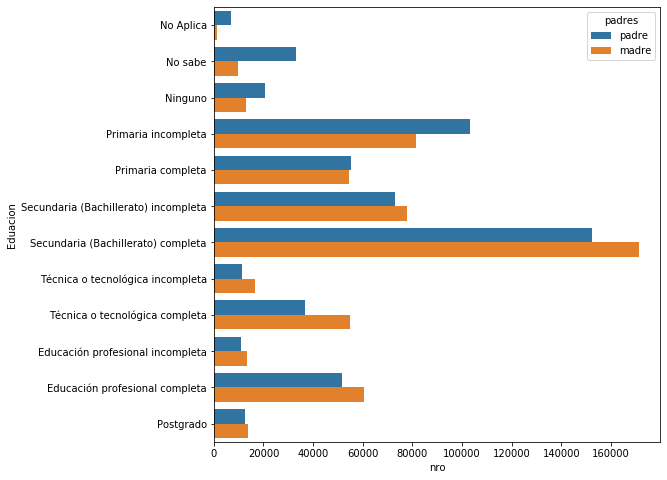

In [639]:
padre=df_imput[["FAMI_EDUCACIONPADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_EDUCACIONPADRE"]).count()
madre=df_imput[["FAMI_EDUCACIONMADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_EDUCACIONMADRE"]).count()

padre_madre = pd.merge(padre,madre, left_index=True,right_index=True, how='inner')
padre_madre=padre_madre.rename_axis('Eduacion').reset_index()
padre_madre=padre_madre.rename(columns={'ESTU_INSE_INDIVIDUAL_x':'padre',
                                   'ESTU_INSE_INDIVIDUAL_y':'madre'})

padre_madre=padre_madre.melt(id_vars=['Eduacion'], var_name = 'padres', value_name = 'nro')

df_imput["FAMI_EDUCACIONMADRE"].unique()
orden = ['No Aplica', 'No sabe','Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 
        'Técnica o tecnológica incompleta','Técnica o tecnológica completa','Educación profesional incompleta', 'Educación profesional completa',
        'Postgrado']


x = 8
y = 8
plt.figure(figsize = (x,y))
sns.barplot(y = "Eduacion", x = "nro", hue = "padres", data = padre_madre , order = orden)
plt.show();

#### Educación padre y madre- Puntaje global

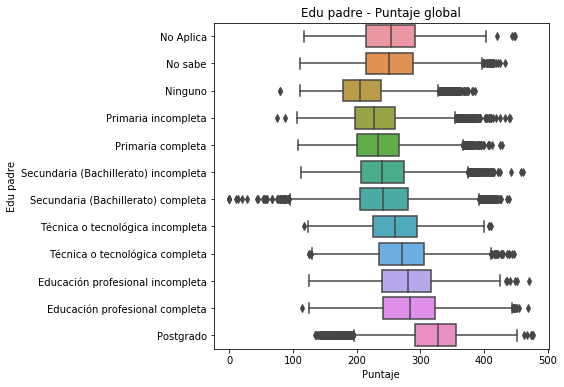

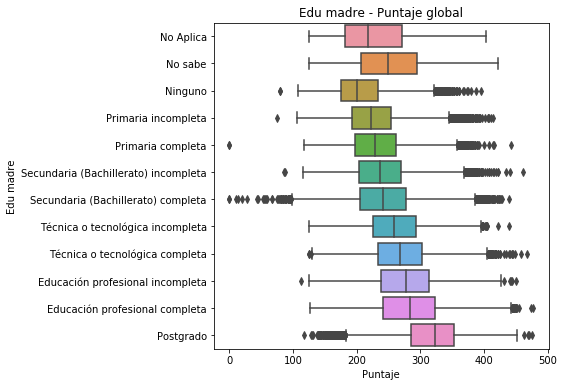

In [638]:
x = 6
y = 6

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_EDUCACIONPADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = orden)
plt.title("Edu padre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Edu padre")
plt.show();

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_EDUCACIONMADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = orden)
plt.title("Edu madre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Edu madre")
plt.show();

### Trabajo padres 

#### Padre y madre

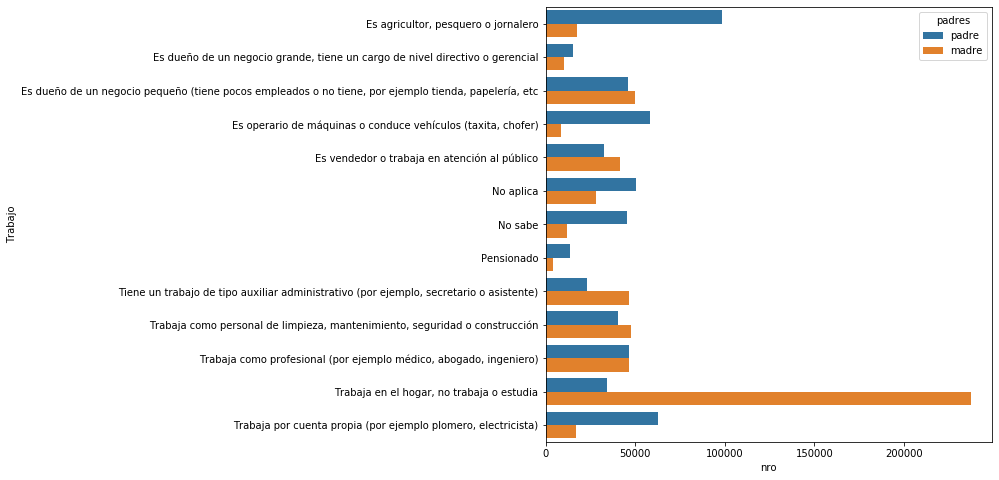

In [643]:
padre=df_imput[["FAMI_TRABAJOLABORPADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_TRABAJOLABORPADRE"]).count()
madre=df_imput[["FAMI_TRABAJOLABORMADRE", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_TRABAJOLABORMADRE"]).count()

padre_madre = pd.merge(padre,madre, left_index=True,right_index=True, how='inner')
padre_madre=padre_madre.rename_axis('Trabajo').reset_index()
padre_madre=padre_madre.rename(columns={'ESTU_INSE_INDIVIDUAL_x':'padre',
                                   'ESTU_INSE_INDIVIDUAL_y':'madre'})

padre_madre=padre_madre.melt(id_vars=['Trabajo'], var_name = 'padres', value_name = 'nro')


x = 8
y = 8
plt.figure(figsize = (x,y))
sns.barplot(y = "Trabajo", x = "nro", hue = "padres", data = padre_madre )
plt.show();
 

#### Trabajo padre y madre- Puntaje global

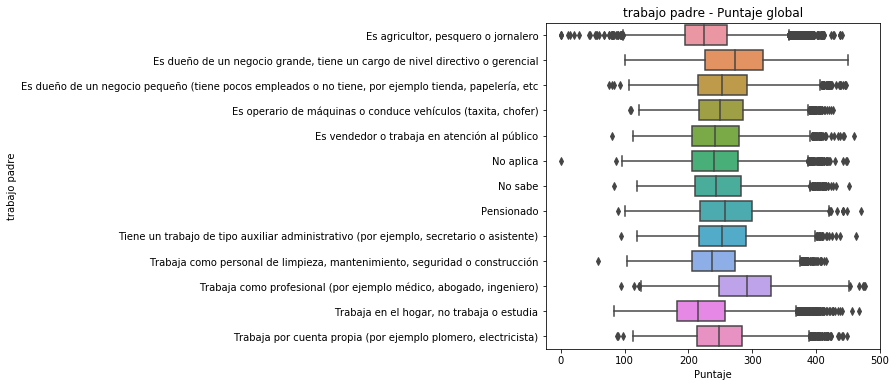

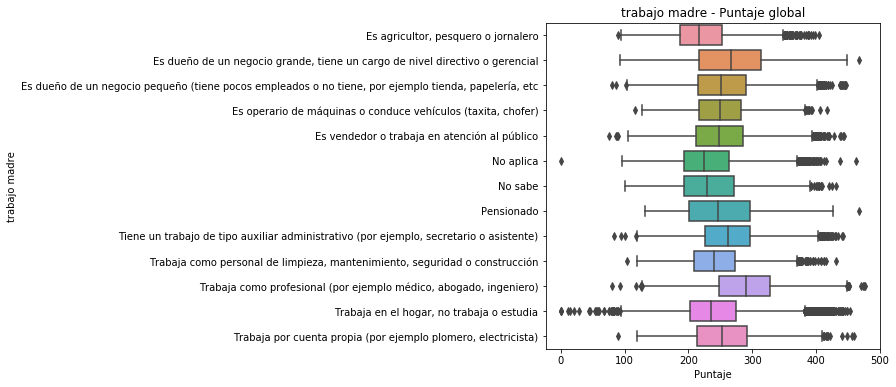

In [658]:
x = 6
y = 6


trabajos = df_imput["FAMI_TRABAJOLABORPADRE"].unique()
trabajos.sort()

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_TRABAJOLABORPADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = trabajos)
plt.title("trabajo padre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("trabajo padre")
plt.show();

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_TRABAJOLABORMADRE", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = trabajos )
plt.title("trabajo madre - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("trabajo madre")
plt.show();

### Familia tiene internet

,FAMI_TIENEINTERNET
FAMI_TIENEINTERNET,
No,203665
Si,363630


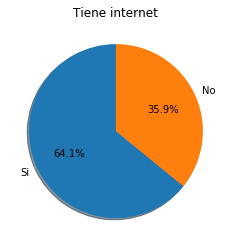

In [665]:
data = df_imput['FAMI_TIENEINTERNET'].value_counts()/df_imput['FAMI_TIENEINTERNET'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Tiene internet');
df_imput[['FAMI_TIENEINTERNET']].groupby(df_imput["FAMI_TIENEINTERNET"]).count()

#### tiene internet - Puntaje global

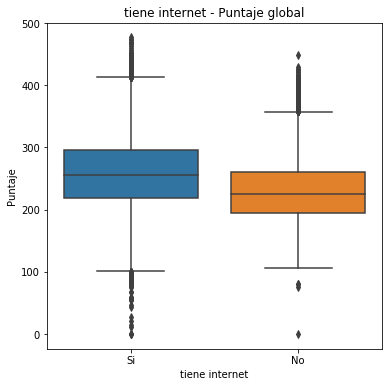

In [668]:
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_TIENEINTERNET", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("tiene internet - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("tiene internet")
plt.show();

### Nro de libros por familia 

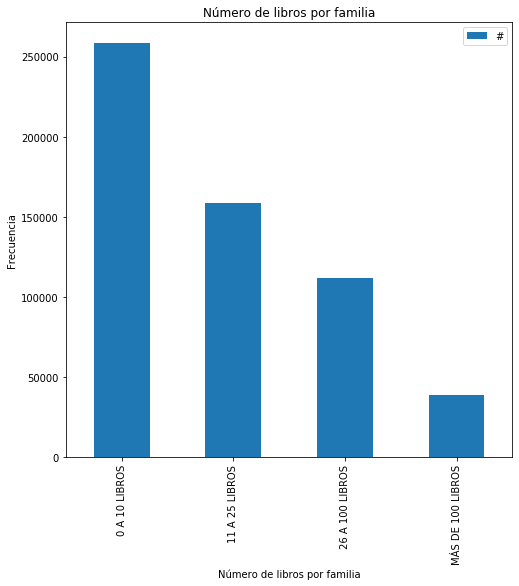

In [669]:
x=8
y=8
df_imput[['FAMI_NUMLIBROS']].groupby(df_imput["FAMI_NUMLIBROS"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Número de libros por familia") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Número de libros por familia")
plt.show();

#### Nro libros - Puntaje global

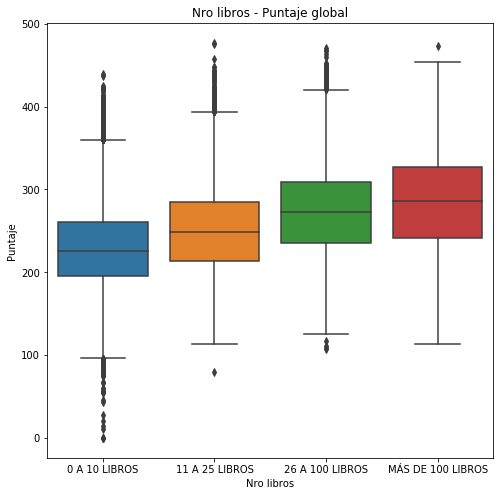

In [671]:
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="FAMI_NUMLIBROS", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 , order = ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS' ])
plt.title("Nro libros - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Nro libros")
plt.show();

### Alimentación

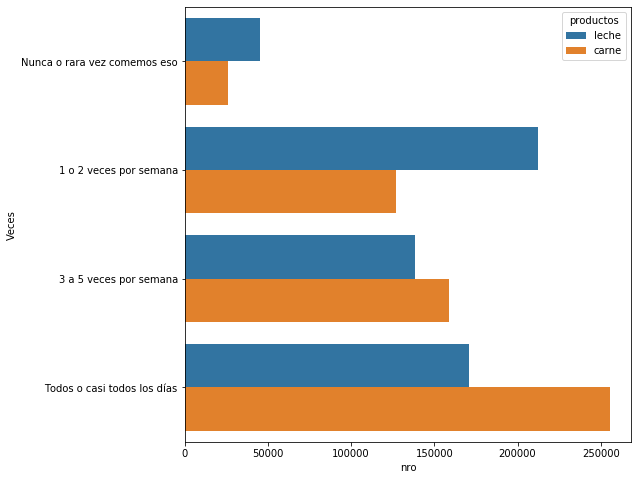

In [682]:
df_imput['FAMI_COMELECHEDERIVADOS'].unique()

leche=df_imput[["FAMI_COMELECHEDERIVADOS", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_COMELECHEDERIVADOS"]).count()
carne=df_imput[["FAMI_COMECARNEPESCADOHUEVO", "ESTU_INSE_INDIVIDUAL"]].groupby(["FAMI_COMECARNEPESCADOHUEVO"]).count()

leche_carne = pd.merge(leche,carne, left_index=True,right_index=True, how='inner')
leche_carne=leche_carne.rename_axis('Veces').reset_index()
leche_carne=leche_carne.rename(columns={'ESTU_INSE_INDIVIDUAL_x':'leche',
                                   'ESTU_INSE_INDIVIDUAL_y':'carne'})

leche_carne=leche_carne.melt(id_vars=['Veces'], var_name = 'productos', value_name = 'nro')

x = 8
y = 8
plt.figure(figsize = (x,y))
sns.barplot(y = "Veces", x = "nro", hue = "productos", data = leche_carne, 
            order = ['Nunca o rara vez comemos eso', '1 o 2 veces por semana','3 a 5 veces por semana', 'Todos o casi todos los días'])
plt.show();


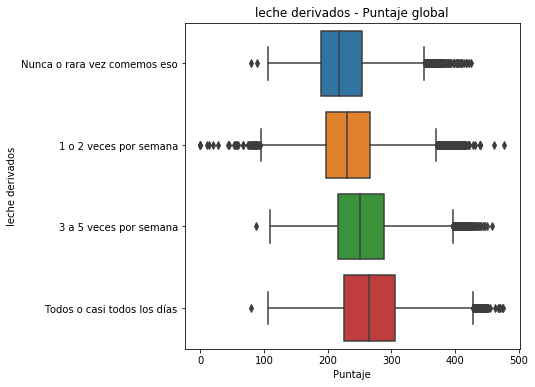

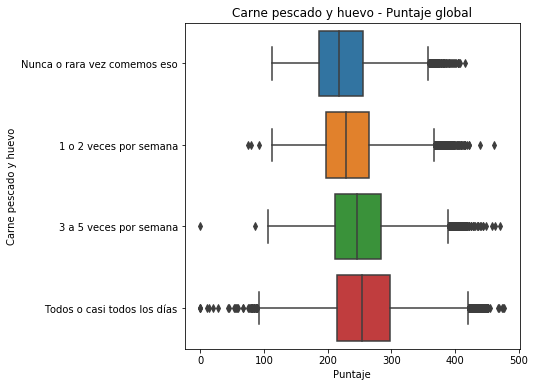

In [686]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_COMELECHEDERIVADOS", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5,order = ['Nunca o rara vez comemos eso', '1 o 2 veces por semana','3 a 5 veces por semana', 'Todos o casi todos los días'] )
plt.title("leche derivados - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("leche derivados")
plt.show();

plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_COMECARNEPESCADOHUEVO", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ['Nunca o rara vez comemos eso', '1 o 2 veces por semana','3 a 5 veces por semana', 'Todos o casi todos los días'])
plt.title("Carne pescado y huevo - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Carne pescado y huevo")
plt.show();

### Situación socioeconómica de la familia del estudiante

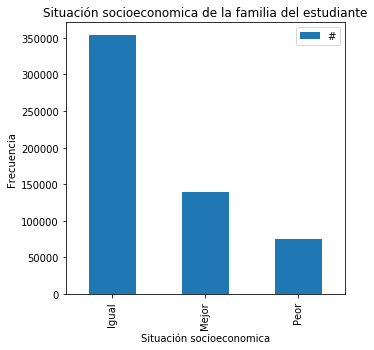

In [810]:
x=5
y=5
df_imput[["FAMI_SITUACIONECONOMICA"]].groupby(df_imput["FAMI_SITUACIONECONOMICA"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Situación socioeconomica") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Situación socioeconomica de la familia del estudiante")
plt.show();

### Situación socioeconomica de la familia del estudiante - Puntaje global

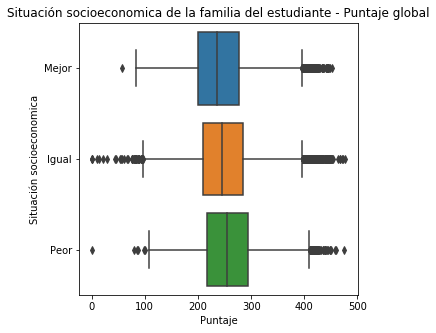

In [811]:
x = 5
y = 5
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="FAMI_SITUACIONECONOMICA", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Situación socioeconomica de la familia del estudiante - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Situación socioeconomica")
plt.show();

### Dedicación estudio (tiempo)

#### Lectura

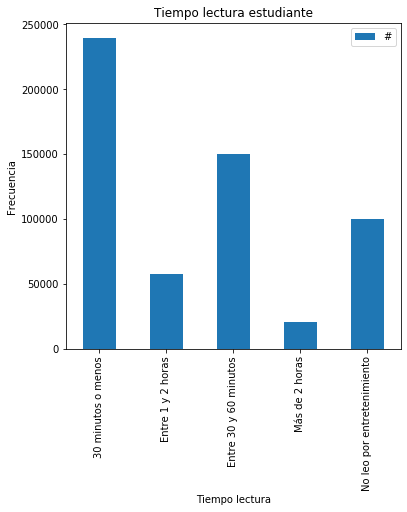

In [723]:
df_imput[["ESTU_DEDICACIONLECTURADIARIA"]].groupby(df_imput["ESTU_DEDICACIONLECTURADIARIA"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Tiempo lectura") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Tiempo lectura estudiante")
plt.show();

#### lectura - Puntaje global

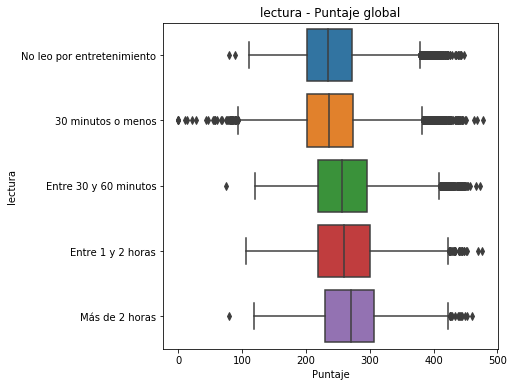

In [725]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="ESTU_DEDICACIONLECTURADIARIA", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ['No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas','Más de 2 horas' ] )
plt.title("lectura - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("lectura")
plt.show();

#### Internet

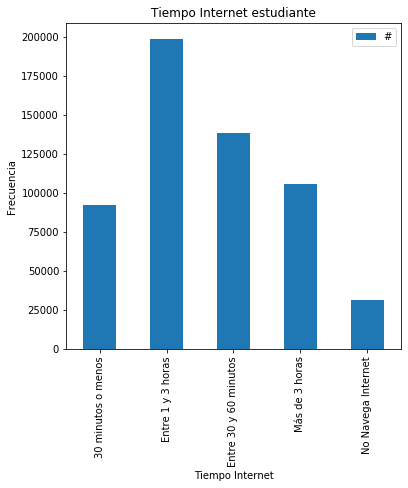

In [727]:
df_imput[["ESTU_DEDICACIONINTERNET"]].groupby(df_imput["ESTU_DEDICACIONINTERNET"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Tiempo Internet") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Tiempo Internet estudiante")
plt.show();

#### Internet - Puntaje global

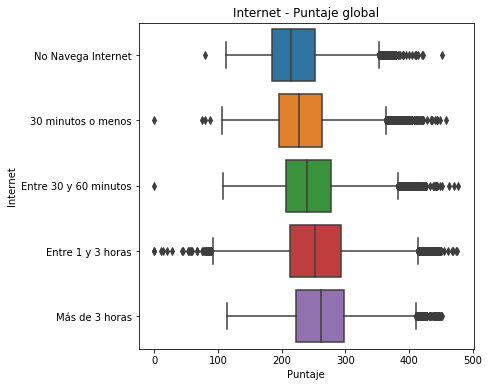

In [729]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(y="ESTU_DEDICACIONINTERNET", x= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ['No Navega Internet', '30 minutos o menos',  'Entre 30 y 60 minutos', 'Entre 1 y 3 horas','Más de 3 horas' ] )
plt.title("Internet - Puntaje global")
plt.xlabel("Puntaje")
plt.ylabel("Internet")
plt.show();

### colegio del estudiante

#### Naturaleza

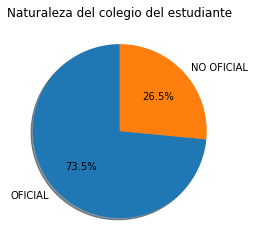

In [732]:
data = df_imput['COLE_NATURALEZA'].value_counts()/df_imput['COLE_NATURALEZA'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Naturaleza del colegio del estudiante');                

#### Naturaleza colegio del estudiante - Puntaje global

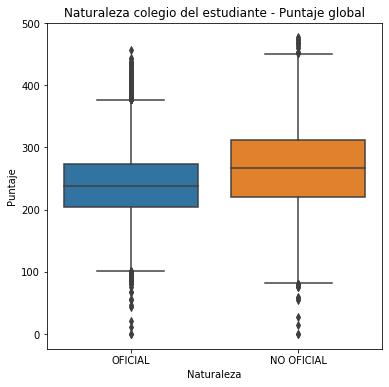

In [734]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_NATURALEZA", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Naturaleza colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Naturaleza")
plt.show();

#### Si es bilingue

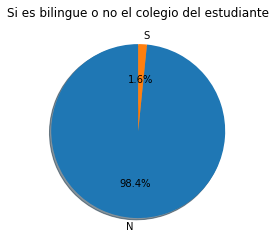

In [735]:
data = df_imput['COLE_BILINGUE'].value_counts()/df_imput['COLE_BILINGUE'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Si es bilingue o no el colegio del estudiante');

#### Si es bilingue o no el colegio del estudiante - Puntaje global

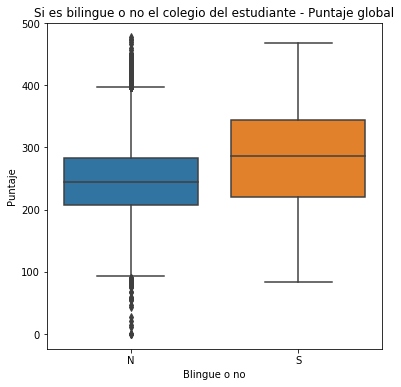

In [737]:
x = 6
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_BILINGUE", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Si es bilingue o no el colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Blingue o no")
plt.show();

#### Caracter

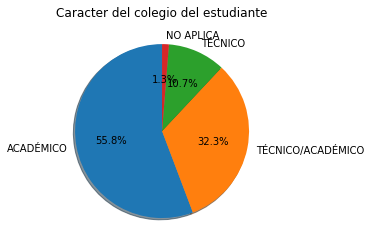

In [739]:
data = df_imput['COLE_CARACTER'].value_counts()/df_imput['COLE_CARACTER'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Caracter del colegio del estudiante');

#### Caracter del colegio del estudiante - Puntaje global

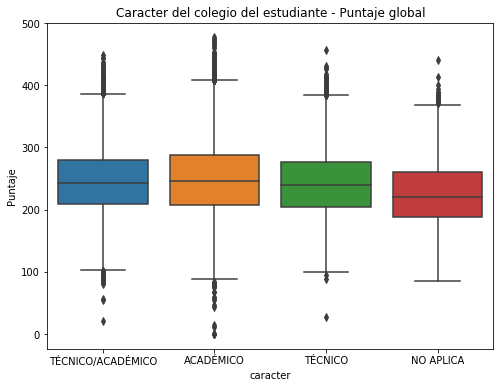

In [741]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_CARACTER", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Caracter del colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("caracter")
plt.show();

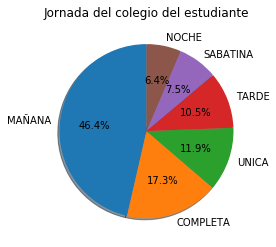

In [742]:
# COLE_JORNADA
data = df_imput['COLE_JORNADA'].value_counts()/df_imput['COLE_JORNADA'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('Jornada del colegio del estudiante');

#### Jornada del colegio del estudiante - Puntaje global

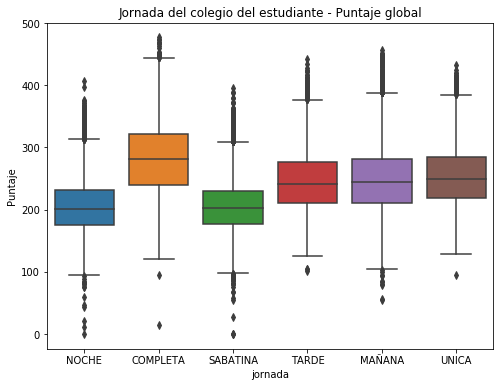

In [743]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="COLE_JORNADA", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5 )
plt.title("Jornada del colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("jornada")
plt.show();

### Puntaje global del estudiante, Indice total del colegio e  Índice Socioeconómico del evaluado 

#### matriz de Correlaciones y mapa de calor 

,PUNT_GLOBAL,indice_total_colegio,ESTU_INSE_INDIVIDUAL
PUNT_GLOBAL,1.000000,0.556189,0.463023
indice_total_colegio,0.556189,1.000000,0.533327
ESTU_INSE_INDIVIDUAL,0.463023,0.533327,1.000000


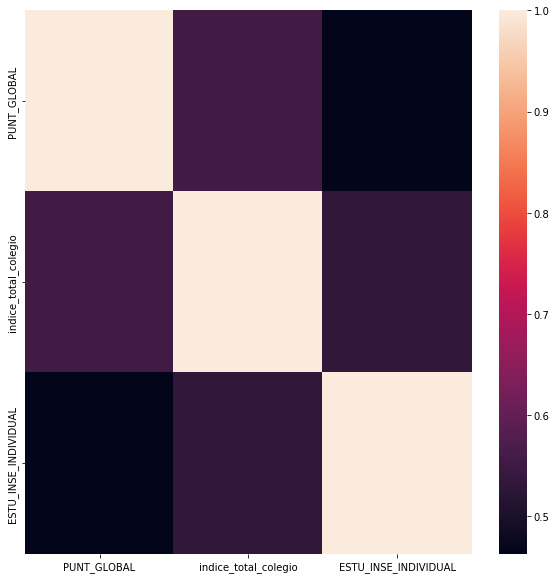

In [812]:
corr_df = df_imput[["PUNT_GLOBAL",  "indice_total_colegio", "ESTU_INSE_INDIVIDUAL"]]
corr =corr_df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr)
df_imput[["PUNT_GLOBAL",  "indice_total_colegio", "ESTU_INSE_INDIVIDUAL"]].corr()

#### Posibles relaciones lineales entre la varibles

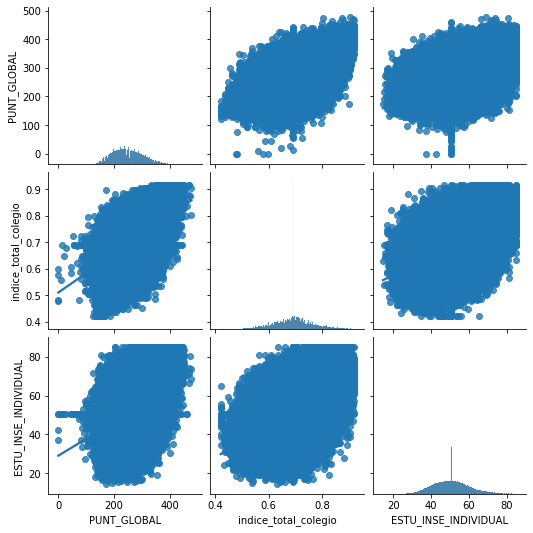

In [806]:
sns.pairplot(df_imput[["PUNT_GLOBAL",  "indice_total_colegio", "ESTU_INSE_INDIVIDUAL"]], kind="reg")
plt.show()

### Categoria colegio del estudiante

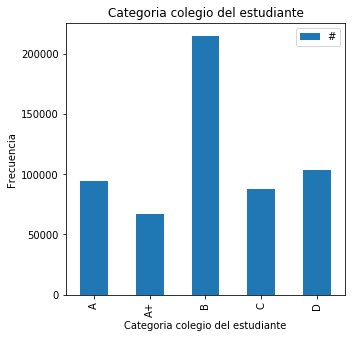

In [813]:
x = 5
y = 5
df_imput[["colegio_categoria"]].groupby(df_imput["colegio_categoria"]).count().plot(kind="bar", figsize = (x,y))
plt.xlabel("Categoria colegio del estudiante") 
plt.ylabel("Frecuencia")
plt.legend("#")
plt.title("Categoria colegio del estudiante")
plt.show();

### Categoria colegio del estudiante - Puntaje global

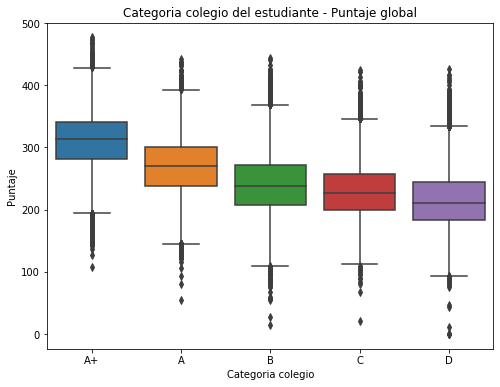

In [815]:
x = 8
y = 6
plt.figure(figsize = (x,y))
ax = sns.boxplot(x="colegio_categoria", y= "PUNT_GLOBAL",
                 data=df_imput, linewidth=1.5, order = ["A+", "A", "B", "C", "D"] )
plt.title("Categoria colegio del estudiante - Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Categoria colegio")
plt.show();

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [23]:
# Código



# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [ ]:
# Código